# CREDIT CARD FRAUD DETECTION USING LOGISTIC REGRESSION

STEP 1 - IMPORTING THE LIBRARIES


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , roc_auc_score, classification_report,confusion_matrix,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

STEP 2 - LOADING AND EXPLORING THE DATASET

In [16]:
cc_data = pd.read_csv('creditcard.csv')
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

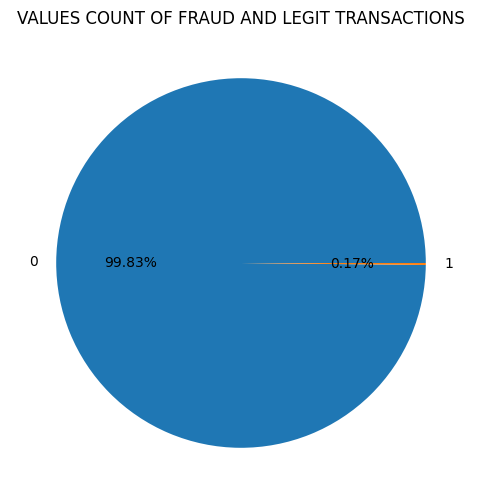

In [18]:
label = cc_data["Class"].unique()
size = cc_data["Class"].value_counts().values

fig,ax = plt.subplots(figsize=(8,6))
ax.pie(size, labels = label, autopct = "%1.2f%%")
ax.set_title("VALUES COUNT OF FRAUD AND LEGIT TRANSACTIONS")
plt.show()

<Axes: >

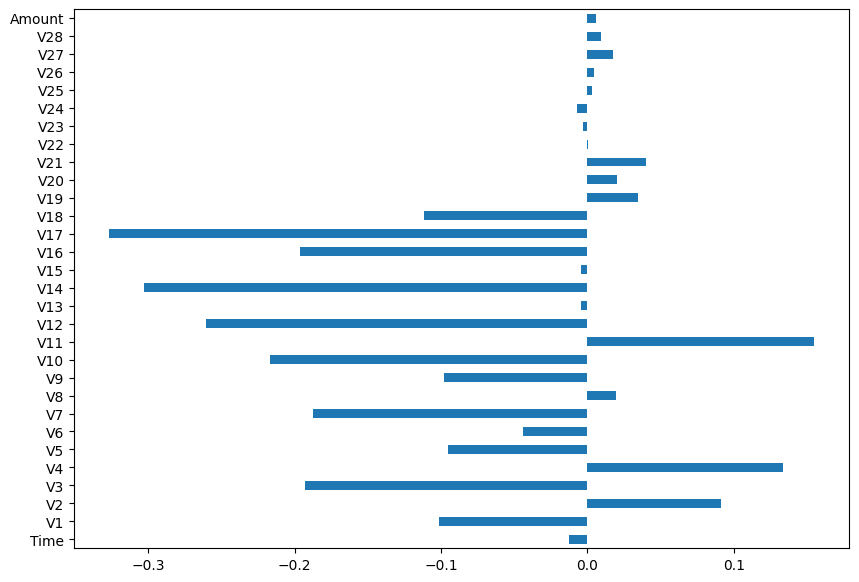

In [30]:
correlation = cc_data.corr()["Class"].drop("Class")
correlation.plot(kind = "barh", figsize =(10,7))

STEP 3 - Standardizing the Features

In [20]:
X = cc_data.drop(["Class"], axis = 1)


In [21]:
y = cc_data["Class"]

In [22]:
X_std = StandardScaler().fit_transform(X)

STEP 4 - Dataset Train/Test Split

In [23]:
X_train , X_test,y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state = 34)

STEP 5 - MODEL TRAINING

In [24]:
LR_model = LogisticRegression(class_weight = "balanced", max_iter=2000, random_state=42)
LR_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

STEP 6 - MODEL EVALUATION

In [25]:
pred= LR_model.predict(X_test)
pred_proba= LR_model.predict_proba(X_test)[:,1]

In [29]:
print(f"accuracy_score : {accuracy_score(y_test,pred)}")
print(f"roc_aoc_score : {roc_auc_score(y_test,pred_proba)}")
print(classification_report(y_test, pred))

accuracy_score : 0.9785119904497735
roc_aoc_score : 0.9801655386113304
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56867
           1       0.07      0.89      0.12        95

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

